<a href="https://colab.research.google.com/github/bwilder95/EVA/blob/master/FiguresCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# import libraries and set fonts 
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.interpolate import CubicSpline
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'Times New Roman'})

   Water Year (WY)  ET (mm/year)       SPI
0             1991           NaN  0.416289
1             1992           NaN -1.548245
2             1993           NaN  2.530307
3             1994           NaN -0.112386
4             1995           NaN  1.466098


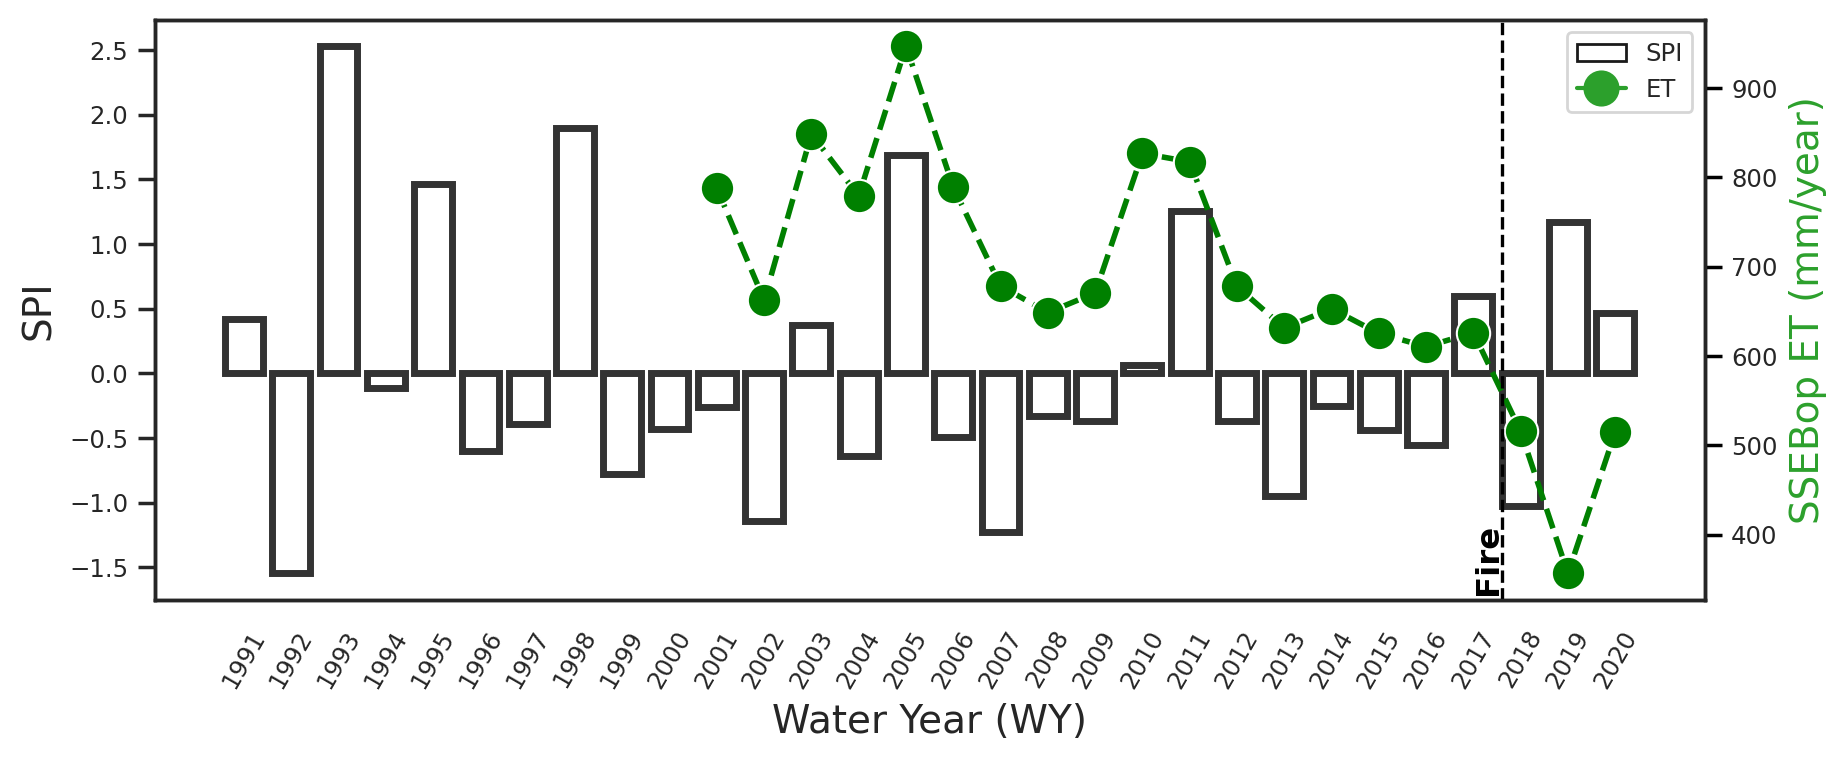

In [26]:
# Figure 2 (SPI and SSEBop)

# Read in dataframe
url = 'https://raw.githubusercontent.com/bwilder95/Figures-for-Holy-Fire-paper/main/data/ssebop_spi.csv'
date_cols = ['Water Year (WY)']
df = pd.read_csv(url, parse_dates=date_cols)
df['Water Year (WY)'] = df['Water Year (WY)'].dt.year
print(df.head())


# Create combo chart
fig, ax1 = plt.subplots(figsize=(10,5))
plt.subplots_adjust(bottom=0.3)
color = 'tab:green'

# bar plot creation
ax1.set_xlabel('Water Year (WY)')
ax1.set_ylabel('SPI')
ax1 = sns.barplot(x='Water Year (WY)', y='SPI', data = df,
                 linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")
ax1.tick_params(axis='y')

# specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'black'

# line plot creation
ax2.set_ylabel('ET (mm/year)',color='tab:green')
ax2 = sns.lineplot(data = df['ET (mm/year)'], sort=False,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax2.tick_params(axis='y', color=color)
ax2.set(ylabel='SSEBop ET (mm/year)')

# rotate x axis
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)

# legend
legend_elements = [Patch(facecolor='white', edgecolor='k',
                         label='SPI'),
                   Line2D([0], [0], marker='o', color='tab:green', label='ET',
                          markerfacecolor='tab:green', markersize=12)]
                         
plt.legend(handles=legend_elements, loc='upper right')

# fire annotations
plt.axvline(26.6, 0,2, color='black', linestyle = 'dashed' , linewidth = 1.2)
plt.text(26, 340, "Fire", horizontalalignment='left', size='small', color='black', weight='bold', rotation =90)

#show/save plot
plt.show()
 

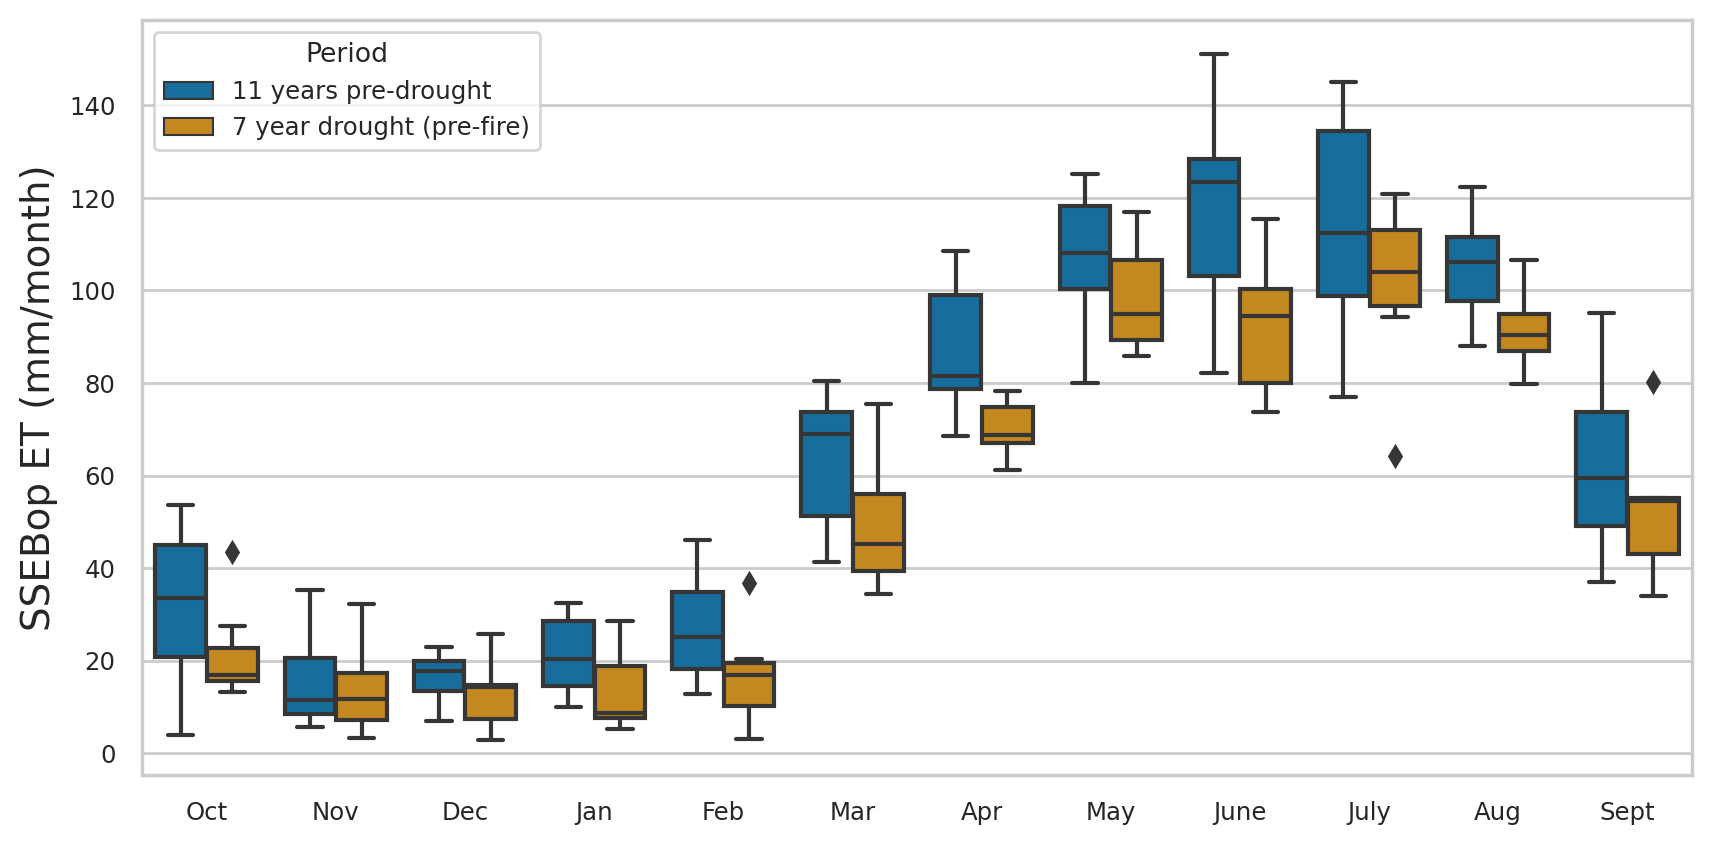

In [27]:
# Figure 3 (SSEBop monthly)


sns.set_style("whitegrid")


# Read in dataframe
url = 'https://raw.githubusercontent.com/bwilder95/Figures-for-Holy-Fire-paper/main/data/ssebop_time.csv'
df = pd.read_csv(url)

df = pd.melt(df,value_vars=['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','June','July','Aug','Sept'],
                id_vars='Period')

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='variable', y='value',data=df, palette='colorblind',hue='Period')
ax.set(ylabel='SSEBop ET (mm/month)')
ax.set(xlabel=None)
#show plot
plt.show()

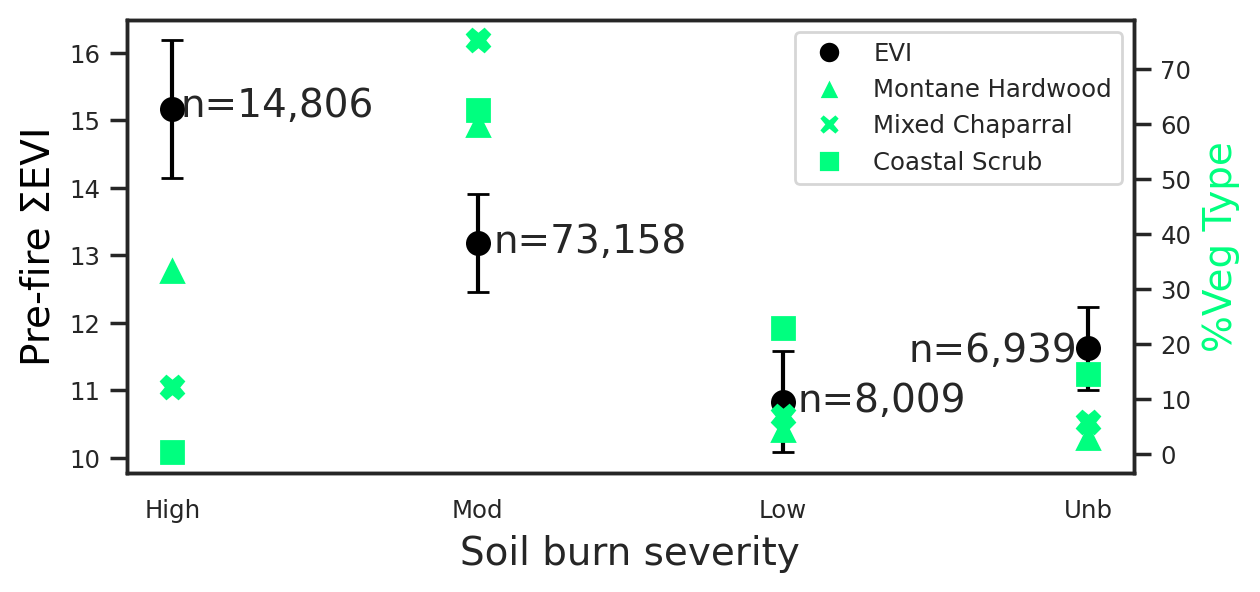

In [28]:
# Figure 4 (EVI and Fveg)

sns.set_style("white")

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [6.5, 3.0]

# Read in dataframe
url1 = 'https://raw.githubusercontent.com/bwilder95/Figures-for-Holy-Fire-paper/main/data/EVI_py.csv'
evi = pd.read_csv(url1)
url2 = 'https://raw.githubusercontent.com/bwilder95/Figures-for-Holy-Fire-paper/main/data/EVI_pyMH.csv'
mh = pd.read_csv(url2)
url3 = 'https://raw.githubusercontent.com/bwilder95/Figures-for-Holy-Fire-paper/main/data/EVI_pyMXX.csv'
mx = pd.read_csv(url3)
url4 = 'https://raw.githubusercontent.com/bwilder95/Figures-for-Holy-Fire-paper/main/data/EVI_pyCOA.csv'
co = pd.read_csv(url4)
sigma = '\u03A3'

# Plot Timeseries
means = evi.mean()
errors = evi.std()

fig, ax = plt.subplots()
ax2 = ax.twinx()
means.plot(x=evi.Date,y=evi.columns,yerr=errors,ax=ax, marker='o', markersize=8, linestyle='None',capsize=4,rot=0,color='black')
ax2.plot(mh['Montane Hardwood'],color='springgreen', marker='^',markersize=8, linestyle='None')
ax2.plot(mx['Mixed Chaparral'],color='springgreen', marker='X',markersize=8, linestyle='None')
ax2.plot(co['Coastal Scrub'],color='springgreen', marker='s',markersize=8, linestyle='None')
ax.set_xlabel('Soil burn severity')
ax.set_ylabel('Pre-fire ' + sigma + 'EVI', color='black')
ax2.set_ylabel('%Veg Type',color='springgreen')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='EVI',
                          markerfacecolor='black', markersize=8),
                   Line2D([0], [0], marker='^', color='w', label='Montane Hardwood',
                          markerfacecolor='springgreen', markersize=8),
                   Line2D([0], [0], marker='X', color='w', label='Mixed Chaparral',
                          markerfacecolor='springgreen', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='Coastal Scrub',
                          markerfacecolor='springgreen', markersize=8)]
                         


plt.legend(handles=legend_elements)

ax.text(0.15, 0.81,'n=14,806', ha='center', va='center', transform=ax.transAxes,size='14')
ax.text(0.46, 0.51,'n=73,158', ha='center', va='center', transform=ax.transAxes,size='14')
ax.text(0.75, 0.16,'n=8,009', ha='center', va='center', transform=ax.transAxes,size='14')
ax.text(0.86, 0.27,'n=6,939', ha='center', va='center', transform=ax.transAxes,size='14')
ax.xaxis.set_ticks_position('none') 
plt.show()

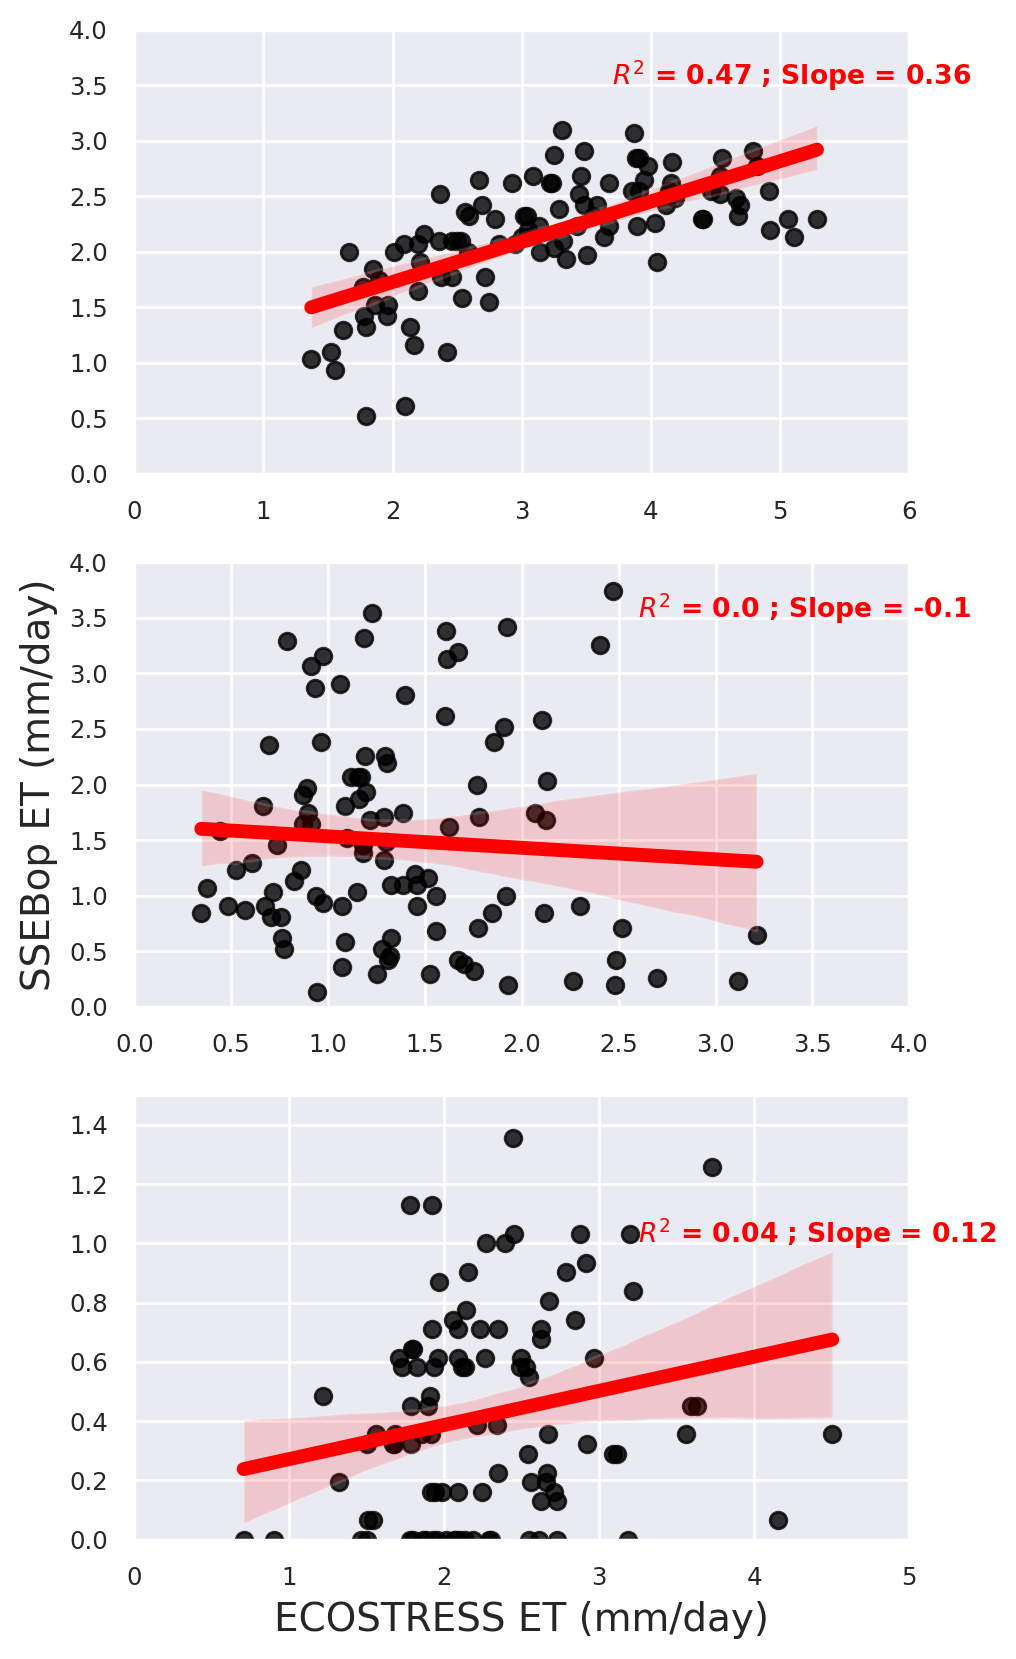

In [29]:
# Figure 5 (SSEBop and ECOSTRESS pixels)


# import libraries
import scipy

def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2
def m(x,y):

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return slope

# load data and drop NAN
url1 = 'https://raw.githubusercontent.com/bwilder95/Figures-for-Holy-Fire-paper/main/data/ee-chart_2018.csv'
df2018 = pd.read_csv(url1)
url2 = 'https://raw.githubusercontent.com/bwilder95/Figures-for-Holy-Fire-paper/main/data/ee-chart_2019.csv'
df2019 = pd.read_csv(url2)
url3 = 'https://raw.githubusercontent.com/bwilder95/Figures-for-Holy-Fire-paper/main/data/ee-chart_2020.csv'
df2020 = pd.read_csv(url3)
df2018 = df2018.dropna()
df2019 = df2019.dropna()
df2020 = df2020.dropna()

# calc r2
r2018 = rsquared(df2018['ECOSTRESS ET (mm/day)'], df2018['SSEBop ET (mm/day)'])
r2019 = rsquared(df2019['ECOSTRESS ET (mm/day)'], df2019['SSEBop ET (mm/day)'])
r2020 = rsquared(df2020['ECOSTRESS ET (mm/day)'], df2020['SSEBop ET (mm/day)'])

# calc slope
m2018 = m(df2018['ECOSTRESS ET (mm/day)'], df2018['SSEBop ET (mm/day)'])
m2019 = m(df2019['ECOSTRESS ET (mm/day)'], df2019['SSEBop ET (mm/day)'])
m2020 = m(df2020['ECOSTRESS ET (mm/day)'], df2020['SSEBop ET (mm/day)'])

# seaborn 3 subplots
sns.set(rc = {'figure.figsize' : ( 5, 10 ),  
               'axes.labelsize' : 14,  
               'font.family' : 'Times New Roman'}, font_scale=0.80)

fig, ax = plt.subplots(3,1)
g1 = sns.regplot(ax=ax[0],x=df2018['ECOSTRESS ET (mm/day)'], y=df2018['SSEBop ET (mm/day)'],
                scatter_kws={"color": "black"}, line_kws={"color": "red",'linewidth':5})
g1.set(ylim=[0,4])
g1.set(xlim=[0,6])
g1.set(xlabel=None)
g1.set(ylabel=None)

g2 = sns.regplot(ax=ax[1],x=df2019['ECOSTRESS ET (mm/day)'], y=df2019['SSEBop ET (mm/day)'],
                scatter_kws={"color": "black"}, line_kws={"color": "red",'linewidth':5})
g2.set(ylim=[0,4])
g2.set(xlim=[0,4])
g2.set(xlabel=None)

g3 = sns.regplot(ax=ax[2],x=df2020['ECOSTRESS ET (mm/day)'], y=df2020['SSEBop ET (mm/day)'],
                scatter_kws={"color": "black"}, line_kws={"color": "red",'linewidth':5})
g3.set(ylim=[0,1.5])
g3.set(xlim=[0,5])
g3.set(ylabel=None)

# plot r2 values
g1.text(3.7, 3.5,'$R^2$ = ' + str(round(r2018,2)) + ' ; Slope = ' + str(round(m2018,2)), horizontalalignment='left', size='medium', color='red', weight='bold')
g2.text(2.6, 3.5,'$R^2$ = ' + str(round(r2019,2))+  ' ; Slope = ' + str(round(m2019,2)), horizontalalignment='left', size='medium', color='red', weight='bold')
g3.text(3.25, 1.0,'$R^2$ = ' + str(round(r2020,2))+ ' ; Slope = ' + str(round(m2020,2)), horizontalalignment='left', size='medium', color='red', weight='bold')

plt.show()

         Date  Rain (mm)  ...  Coldwater  Santiago
0  2018-12-04      0.000  ...   0.110368  0.000000
1  2018-12-05     10.922  ...   0.097809  0.000000
2  2018-12-06     54.102  ...   1.583653  0.021005
3  2018-12-07      1.016  ...   0.203286  0.001511
4  2018-12-08      0.000  ...   0.181585  0.000000

[5 rows x 8 columns]


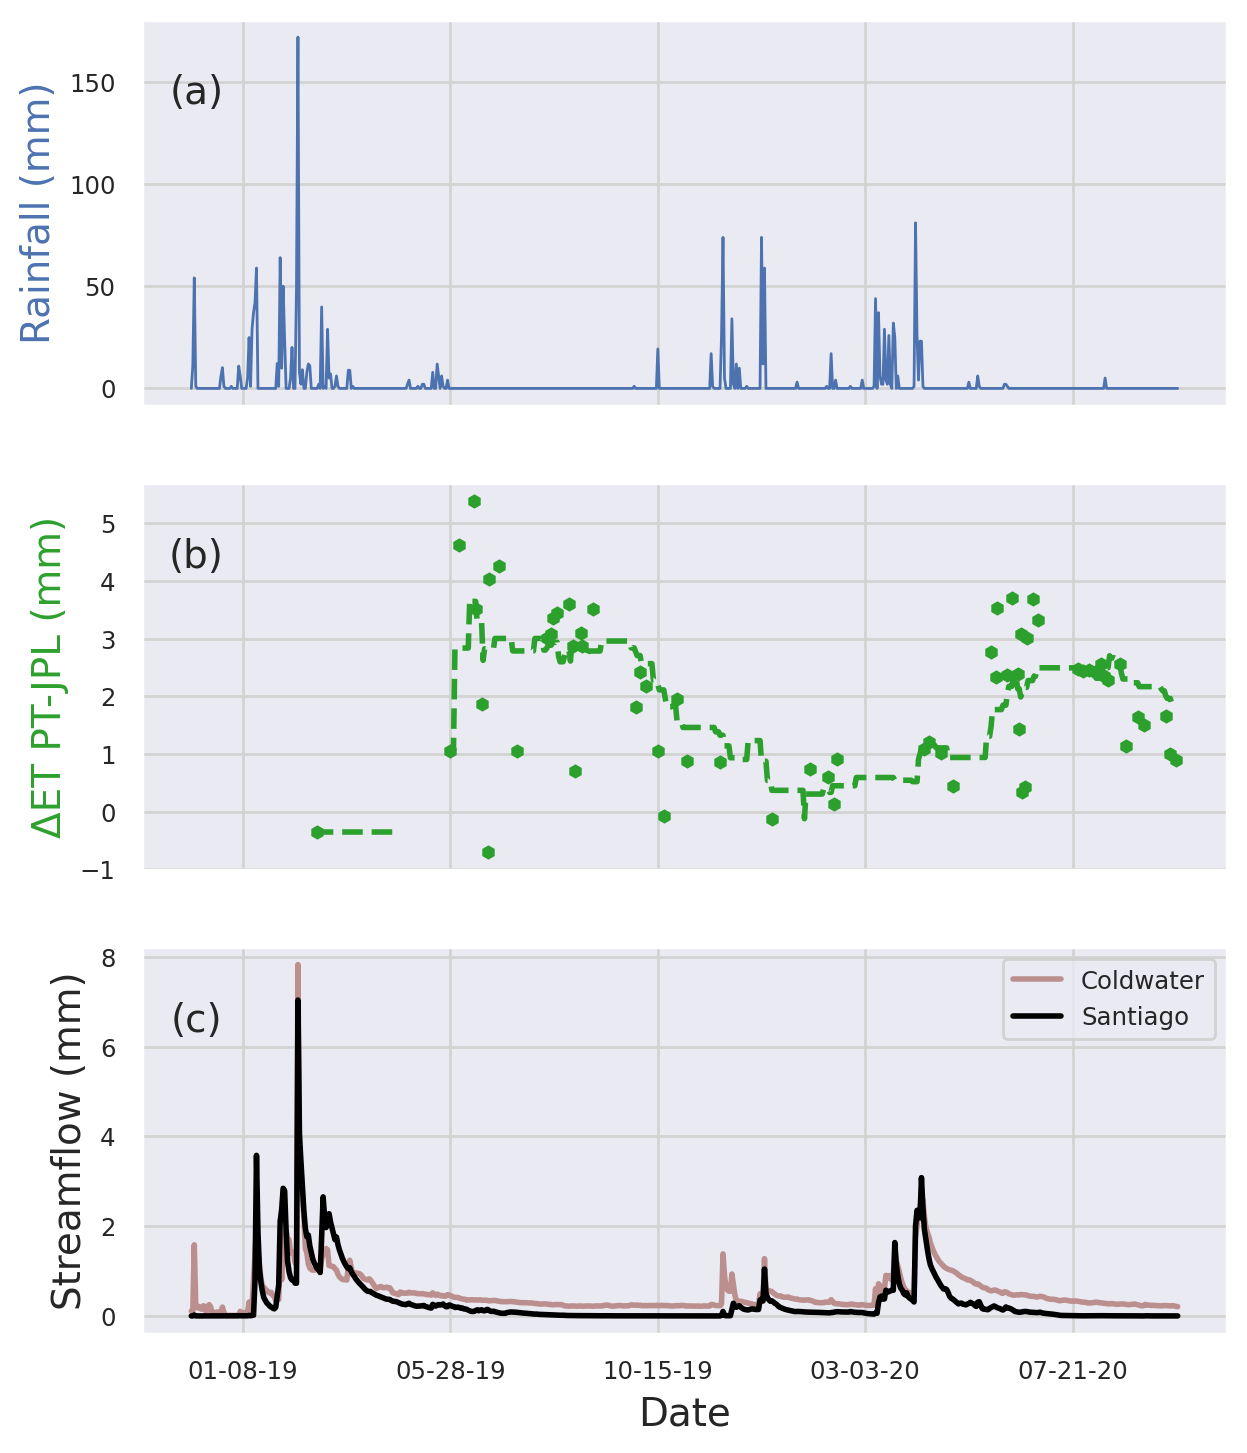

In [30]:
# Figure 6 (Rainfall, ECOSTRESS ET, and Runoff)


url = 'https://raw.githubusercontent.com/bwilder95/Figures-for-Holy-Fire-paper/main/data/Link_Hyd_Sig_v2_python.csv'
flow = pd.read_csv(url)

# apply box cox transform
flow['Coldwater'] = ((flow['CW Daily Flow (mm)'] + 1)**0.3 -1 ) / 0.3
flow['Santiago'] = ((flow['Sant Daily Flow (mm)'] + 1)**0.3 -1 ) / 0.3


# remove hour and min
flow['Date'] = pd.to_datetime(flow['Date'])
flow['Date'] = flow['Date'].dt.date
print(flow.head())

fig, (ax,ax1,ax2) = plt.subplots(3,sharex=True,figsize=(7,9))
plt.subplots_adjust(bottom=0.15)

# rain
flow.plot(x='Date', y='Rain (mm)',ax=ax,color='b',linewidth=1.0)
ax.set_ylabel("Rainfall (mm)")
ax.yaxis.label.set_color('b')

# et
flow['Delta ET (mm)'] =  flow['Sant Avg daily ET (mm day-1)'] - flow['CW Avg daily ET (mm day-1)']
flow.plot(x='Date',y=['Delta ET (mm)'], ax=ax1, linewidth=0,marker='h',markersize=4, color='tab:green')

# rolling avg
flow['60day_avg'] = flow['Delta ET (mm)'].rolling(60,min_periods=1).mean().shift(-3)
flow.plot(x='Date',y=['60day_avg'], ax=ax1, color='tab:green',linewidth=2, linestyle='dashed')

ax1.set_ylabel('\u0394' + "ET PT-JPL (mm)")
ax1.yaxis.label.set_color('tab:green') 

# streamflow
flow.plot(x='Date',y=['Coldwater','Santiago'],ax=ax2,color = [ 'rosybrown','black'],linewidth=2.0)
ax2.set_ylabel('Streamflow (mm)')
# rotate x axis
#ax.set_xticklabels(ax2.get_xticklabels(), rotation=60)
date_form = DateFormatter("%m-%d-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=20))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=20))
ax.get_legend().remove()
ax1.get_legend().remove()

# a,b,c
ax.text(0.05, 0.81,'(a)', ha='center', va='center', transform=ax.transAxes,size='14')
ax1.text(0.05, 0.81,'(b)', ha='center', va='center', transform=ax1.transAxes,size='14')
ax2.text(0.05, 0.81,'(c)', ha='center', va='center', transform=ax2.transAxes,size='14')

# Show the grid lines as light grey lines
ax.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax1.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax2.grid(b=True, which='major', color='lightgrey', linestyle='-')


plt.show()
